In [76]:
import numpy as np  # imports the numpy library as np
from sklearn.linear_model import LinearRegression # imports the LinearRegression model from slkearn

list1 = [2, 2, 3, 4, 4, 5, 6, 7, 8, 9] # creates the first part of dataset
list2 = [10, 11, 12, 13, 14, 15, 20, 18, 22, 25] # creates the second part of dataset
X = np.array(list1).reshape(-1,1) # converts list 1 into numpy array and shapes into a vector
y = np.array(list2) # converts list 2 into a numpy array

reg = LinearRegression().fit(X, y) # initalizes a linearregression object and model to the data

print ('Intercept: ', reg.intercept_) # prints the y-intercept
print ('Coefficient', reg.coef_[0]) # prints the slope of the line

Intercept:  6.0
Coefficient 2.0


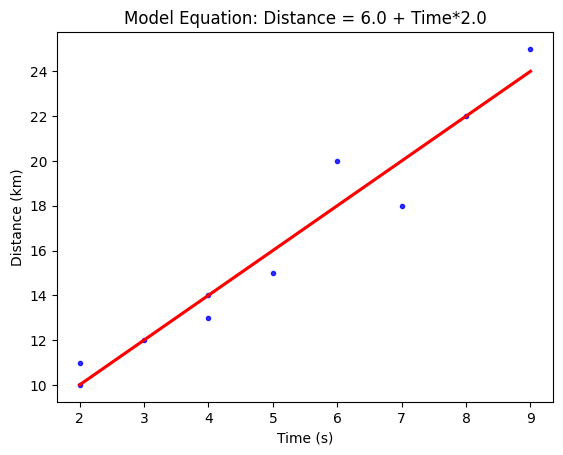

In [77]:
import matplotlib.pyplot as plt # imports the matplotlib library
import seaborn as sns # imports the seaborn library, is better for drawing graphics

g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's':9}, ci=False, color='r') # creates a scatter plot with a regression line
  # sets indepdent variable, sets dependent variable, changes the scatter plot color to blue and size 9, removes confidence interval, sets color of regression line to red
g.set_title(f'Model Equation: Distance = {round(reg.intercept_, 2)} + Time*{round(reg.coef_[0], 2)}') # changes title to display the equation
g.set_ylabel('Distance (km)') # changes the y axis label to distance
g.set_xlabel('Time (s)') # changes the x axis label to time
plt.show() # displays the plot

In [78]:
from google.colab import drive # imports the google drive module from colab
drive.mount('/content/drive') # mounts google drive to the directory files allowing access to files in google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
from sklearn.metrics import mean_squared_error # imports mean squared error library from sklearn

y_pred = reg.predict(X) # predicts values of y based upon x
rsq = round(reg.score(X,y), 4) # Calculates the R-squared value (a measure of how well the model explains the variance in the data) and rounds it to 4 decimal places.
mse = np.sum((np.array(y)-np.array(y_pred))**2)/8 # Calculates the mean squared error manually by summing the squared differences between actual and predicted values and dividing by 8 (the number of observations minus one)
stderr = round(np.sqrt(mse), 4) # Computes the standard error by taking the square root of the mean squared error and rounds it to 4 decimal places.
correlation_coefficient = round(np.corrcoef(list1, list2)[0, 1], 4) # Calculates the Pearson correlation coefficient between the values in list1 and list2 (how strongly they are linearly related). The [0, 1] index extracts the correlation value, and it is rounded to 4 decimal places.
print('R-squared:', rsq) # prints the r-squared value
print('Mean Squared Error:', mse) # prints the mean squared error
print('Standard Error:', stderr) # prints the standard error
print('Correlation Coefficient:', correlation_coefficient) # prints the correlation coefficient

R-squared: 0.9474
Mean Squared Error: 1.5
Standard Error: 1.2247
Correlation Coefficient: 0.9733


In [80]:
import pandas as pd # imports the pandas library
from google.colab import drive # imports the google drive module from colab
drive.mount('/content/drive') # mounts google drive to the directory files allowing access to files in google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
def overview(): # define a function named overview
    data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/cereal.csv") # read the csv file from google drive
    print("The first 5 rows of data are:\n")
    print(data.head)
    print("\n\n\nDataset has {} rows and {} columns".format(data.shape[0], data.shape[1]))
    print("\n\n\nDatatype: \n")
    print(data.dtypes)
    print("\n\n\nData summary: \n")
    print(data.describe())
    return data
    # ^ creates the format of the data to output including the headers, data types, size of the data, and the stats of it
data = overview() # calls the function

The first 5 rows of data are:

<bound method NDFrame.head of                          name mfr type  calories  protein  fat  sodium  fiber  \
0                   100% Bran   N    C        70        4    1     130   10.0   
1           100% Natural Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4              Almond Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties Honey Gold   G    C       110

The code above mounts your Google Drive and reads in the cereals.csv file assuming that you have put your cereals.csv file in the directory with your code.  You will use this data to recreate the example in the slides, and above, with the hiking data.  That is, you should perform a simple least squares regression to estmiate rating based on sugar content.  You should create your model, plot it, and obtain the statistics as shown in the example above.

In [82]:
#You will write your code to estimate cereal ratings here, using whatever cells you need.
from sklearn.metrics import mean_squared_error #imports the mse library from sklearn

y_pred = reg.predict(X)  # predicts values of y based upon x
rsq = round(reg.score(X,y), 16) # Calculates the R-squared value (a measure of how well the model explains the variance in the data) and rounds it to 4 decimal places. Uses the 16th column, the nutrional rating
mse = np.sum((np.array(y)-np.array(y_pred))**2)/16 # Calculates the mean squared error manually by summing the squared differences between actual and predicted values and dividing by 8 (the number of observations minus one)
stderr = round(np.sqrt(mse), 16) # Computes the standard error by taking the square root of the mean squared error and rounds it to 4 decimal places.
correlation_coefficient = round(np.corrcoef(list1, list2)[0, 1], 16)
print('R-squared:', rsq)  # prints the r-squared value
print('Mean Squared Error:', mse)  # prints the mean squared error
print('Standard Error:', stderr)  # prints the standard error
print('Correlation Coefficient:', correlation_coefficient)  # prints the correlation coefficient

R-squared: 0.9473684210526316
Mean Squared Error: 0.75
Standard Error: 0.8660254037844386
Correlation Coefficient: 0.9733285267845754


Now, try to extend it to a multiple linear regression and use sugars and fibers to estimate rating.  This one you don't have to plot, just model it and print out the statistics.

Intercept:  2.676052171807158
Coefficient -0.07571485408846376


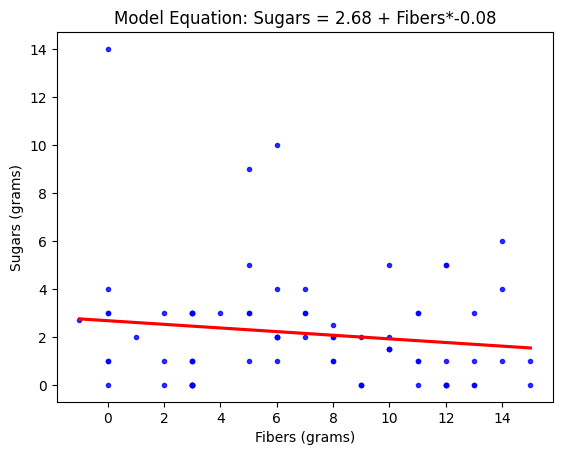

In [83]:
#You will write your code to estimate cereal ratings here, using whatever cells you need.
import numpy as np # imports the numpy library
from sklearn.linear_model import LinearRegression # import the linearregression class
list_1 = [6, 8, 5, 0, 8, 10, 14, 8, 6, 5, 12, 1, 9, 7, 13, 3, 2, 12, 13, 7, 0, 3, 10, 5, 13, 11, 7, 10, 12, 12, 15, 9, 5, 3, 4, 11, 10, 11, 6, 9, 3, 6, 12, 3, 11, 11, 13, 6, 9, 7, 2, 10, 14, 3, 0, 0, 6, -1, 12, 8, 6, 2, 3, 0, 0, 0, 15, 3, 5, 3, 14, 3, 3, 12, 3, 3, 8] # Defines a list of integers representing the independent variable values
list_2 = [10.0, 2.0, 9.0, 14.0, 1.0, 1.5, 1.0, 2.0, 4.0, 5.0, 0.0, 2.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0, 4.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 3.0, 5.0, 5.0, 0.0, 0.0, 0.0, 3.0, 3.0, 3.0, 1.0, 1.5, 0.0, 1.0, 2.0, 0.0, 2.0, 0.0, 0.0, 3.0, 3.0, 3.0, 2.0, 0.0, 3.0, 3.0, 1.5, 6.0, 1.0, 0.0, 1.0, 2.0, 2.7, 5.0, 2.5, 2.0, 0.0, 0.0, 3.0, 4.0, 3.0, 1.0, 1.0, 3.0, 0.0, 4.0, 3.0, 0.0, 0.0, 3.0, 3.0, 1.0] # Defines another list of floating-point numbers representing the dependent variable values
X = np.array(list_1).reshape(-1,1) # Converts list_1 into a NumPy array and reshapes it into a column vector
y = np.array(list_2) # Converts list_2 into a NumPy array

reg = LinearRegression().fit(X, y)  # Initializes a LinearRegression model and fits it to the data (X and y). This finds the best-fit line for the given data.

print ('Intercept: ', reg.intercept_)  # Prints the y-intercept of the regression line.
print ('Coefficient', reg.coef_[0])  # Prints the slope (coefficient) of the regression line.

import matplotlib.pyplot as plt # imports the matplotlib library
import seaborn as sns # improts the seaborn library

g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's':9}, ci=False, color='r')  # Creates a scatter plot with a regression line
g.set_title(f'Model Equation: Sugars = {round(reg.intercept_, 2)} + Fibers*{round(reg.coef_[0], 2)}')  # Sets the title of the plot to display the equation of the regression line
g.set_ylabel('Sugars (grams)')  # Sets the label for the y-axis to 'Sugars (grams)'
g.set_xlabel('Fibers (grams)')  # Sets the label for the x-axis to 'Fibers (grams)'
plt.show()  # Displays the plot

This notebook will continue by exploring code to do different types of regressions, as we have been doing, you should use gemini to help you comment it.

In [84]:
np.random.seed(42) # sets random seed to 42
m = 100 # sets the variable m as 100 which is the number of data points to be generated
X = 6 * np.random.rand(m, 1) - 3 # generates a vector of random numbers between -3 and 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1) # generates a vector of random numbers that follow a specific pattern

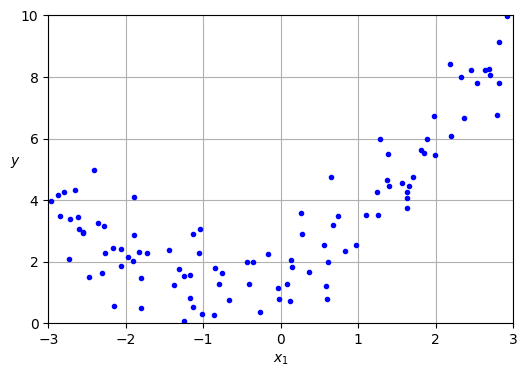

In [85]:
plt.figure(figsize=(6, 4)) # create a new figure with the size of 6x4
plt.plot(X, y, "b.") # plots the data points in blue
plt.xlabel("$x_1$") # sets the label on x axis to x sub 1
plt.ylabel("$y$", rotation=0)  # sets the label on the y axis to y and rotates it
plt.axis([-3, 3, 0, 10])  # sets the axis limits to -3 to 3 on the x axis and 0 to 10 on the y axis
plt.grid() # adds a grid to the plot
plt.show() # shows the plot

In [86]:
from sklearn.preprocessing import PolynomialFeatures # imports the PolynomialFeatures class

poly_features = PolynomialFeatures(degree=2, include_bias=False) # Initializes a PolynomialFeatures object to transform the input features into polynomial features of degree 2
X_poly = poly_features.fit_transform(X) # Transforms the input feature matrix 'X' into a new feature matrix 'X_poly' with polynomial features.
X[0] # Returns the first element of the original 'X' array, which represents the value of the first data point before transformation.

array([-0.75275929])

In [87]:
X_poly[0] # returns the first transformed data point from the xpolyarray

array([-0.75275929,  0.56664654])

In [88]:
lin_reg = LinearRegression() # Initializes a LinearRegression object to perform linear regression
lin_reg.fit(X_poly, y) # Fits the linear regression model to the transformed feature matrix 'X_poly' and the target vector 'y
lin_reg.intercept_, lin_reg.coef_ # Returns the intercept and coefficient values of the linear regression model

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

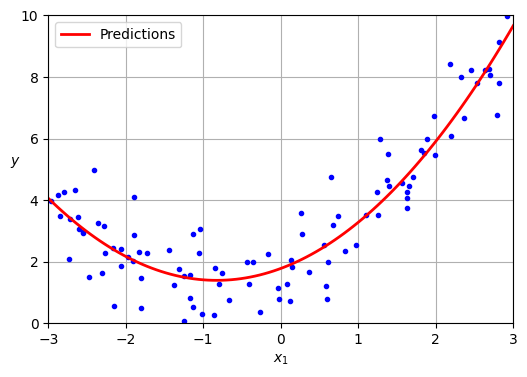

In [89]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1) # creates a new array of 100 evenly spaced values between -3 and 3 and reshapes it into a column vector
X_new_poly = poly_features.transform(X_new) # transforms the newly generated input data into polynomial features
y_new = lin_reg.predict(X_new_poly) # Uses the previously fitted linear regression model 'lin_reg' to make predictions for the transformed 'X_new_poly'.

plt.figure(figsize=(6, 4)) # creates a new figure thats 6x4
plt.plot(X, y, "b.") # plots the data points in blue
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions") # plots the predictions made by the linear regression model
plt.xlabel("$x_1$") # sets the label on x axis to x sub 1
plt.ylabel("$y$", rotation=0) # sets the label on the y axis to y and changes the rotation
plt.legend(loc="upper left") # places the legend in the upper left corner
plt.axis([-3, 3, 0, 10]) # Sets the axis limits: x-axis ranges from -3 to 3, y-axis ranges from 0 to 10.
plt.grid() # adds a grid
plt.show() # displays the plot

In [90]:
from sklearn.datasets import load_iris # imports the load_iris function from sklearn.datasets, iris is a dataset

iris = load_iris(as_frame=True) # loads the iris dataset as a pandas dataframe
list(iris) # lists the data in the iris dataset

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [91]:
iris.data.head(3) # Returns the first 3 rows of the 'data' DataFrame in the Iris dataset,

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [92]:
iris.target_names # returns the target names in the iris dataset

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [93]:
from sklearn.linear_model import LogisticRegression # Imports the LogisticRegression class from scikit-learn
from sklearn.model_selection import train_test_split # Imports the train_test_split function from scikit-learn

X = iris.data[["petal width (cm)"]].values # Selects the "petal width (cm)" feature from the Iris dataset as the independent variable (X)
y = iris.target_names[iris.target] == 'virginica' # Sets the target variable 'y' as a boolean array, where the label is 'True' if the flower species is 'virginica', and 'False' otherwise.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # Splits the data (X and y) into training and test sets.

log_reg = LogisticRegression(random_state=42) # Initializes a LogisticRegression model with a fixed random state
log_reg.fit(X_train, y_train) # Fits the model to the training data (X_train and y_train)

LogisticRegression(random_state=42)

In [94]:
log_reg.predict([[1.7], [1.5]]) # Uses the trained logistic regression model to predict the class (True/False) for two new input values: 1.7 and 1.5 (representing petal width in cm).

array([ True, False])

In [95]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values # Selects both "petal length (cm)" and "petal width (cm)" as the features from the Iris dataset.
y = iris["target"] # Sets the target variable 'y' as the class labels from the Iris dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # Splits the data (X and y) into training and testing sets.

softmax_reg = LogisticRegression(C=30, random_state=42) # Initializes a LogisticRegression model for multi-class classification using the softmax function
softmax_reg.fit(X_train, y_train) # Fits the softmax regression model to the training data (X_train and y_train)

LogisticRegression(C=30, random_state=42)

In [96]:
softmax_reg.predict([[5, 2]]) # Uses the trained softmax regression model to predict the class label for a new input vector [5, 2]

array([2])

In [97]:
softmax_reg.predict_proba([[5, 2]]).round(2) # Calculates the predicted class probabilities for the input

array([[0.  , 0.04, 0.96]])